## Car Price Prediction via Text Mining and Regression
#### Author : Mirabelle Ding
***
**Objective**: Extracted data on Mercedes-Benz E450 Coupes from online sources to analyze price trends and build predictive models for price estimation based on mileage and age.

**Methodology**:
* Designed and implemented web scraping scripts using BeautifulSoup and requests to extract comprehensive data on Mercedes-Benz E450 Coupe listings from car marketplaces, targeting the Boston and Beverly Hills regions.
* Cleaned and processed the dataset by handling missing values, standardizing units, and extracting key information.
* Conducted exploratory data analysis, including visualizations and correlation analysis, to uncover patterns in vehicle prices, mileage, and model year differences between the two regions.
* Applied multi-linear regression models to develop predictive models, comparing results between two markets to assess regional price depreciation.
* Developed a pricing prediction tool to provide quick estimates based on different mileage inputs, demonstrating the practical use of the model for potential buyers or sellers.

**Skills Utilized**: Data Scraping, Data Cleaning and Processing, Exploratory Data Analysis (EDA), Predictive Modelling, Statistical Analysis, Data Visualization

## Data Extraction

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [14]:
bos_name = []
bos_mileage = []
bos_price = []

bos_url = 'https://www.cars.com/shopping/results/?body_style_slugs[]=coupe&dealer_id=&include_shippable=true&keyword=&list_price_max=&list_price_min=&makes[]=mercedes_benz&maximum_distance=500&mileage_max=&models[]=mercedes_benz-e_class&monthly_payment=&page_size=100&sort=best_match_desc&stock_type=all&trims[]=mercedes_benz-e_class-e_450&trims[]=mercedes_benz-e_class-e_450_4matic&year_max=&year_min=&zip=02215'

for start in range(0, 500, 100): 
    url = bos_url.format(start)
    web_request = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'})
    soup = BeautifulSoup(web_request.content, 'html.parser')

    results_list = soup.find_all('div', {'class':'mt-1 flex w-full items-start p-2 text-left'})
    
    if not results_list:
        break

    for i in results_list:
        try:
            bos_name.append(i.find('h2').get_text())
        except:
            bos_name.append('n/a')

        try:
            bos_mileage.append(i.find('div', {'data-test': 'vehicleMileage'}).get_text())
        except:
            bos_mileage.append('n/a')

        try:
            bos_price.append(i.find('span', {'data-test': 'vehicleCardPriceLabelAmount'}).get_text())
        except:
            bos_price.append('n/a')

bos_car = pd.DataFrame({'Name': bos_name, 'Mileage': bos_mileage, 'Price': bos_price})

In [31]:

bh_name = []
bh_mileage = []
bh_price = []

bh_url = 'https://www.autotrader.com/cars-for-sale/coupe/mercedes-benz/e-450/boston-ma?channel=ATC&facetMinCount=3&newSearch=true&numRecords=100&searchRadius=500&zip=02215&start={}'

for start in range(0, 500, 100): 
    url = bh_url.format(start)
    web_request = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'})
    soup = BeautifulSoup(web_request.content, 'html.parser')

    results_list = soup.find_all('div', {'class':'mt-1 flex w-full items-start p-2 text-left'})
    
    if not results_list:
        break

    for i in results_list:
        try:
            bh_name.append(i.find('h2').get_text())
        except:
            bh_name.append('n/a')

        try:
            bh_mileage.append(i.find('div', {'data-test': 'vehicleMileage'}).get_text())
        except:
            bh_mileage.append('n/a')

        try:
            bh_price.append(i.find('span', {'data-test': 'vehicleCardPriceLabelAmount'}).get_text())
        except:
            bh_price.append('n/a')
            
bh_car = pd.DataFrame({'Name': bh_name, 'Mileage': bh_mileage, 'Price': bh_price})


In [4]:
bos_car['mileage'] = bos_car['mileage'].apply(lambda x:x.replace('miles', '')) 
bh_car['mileage'] = bh_car['mileage'].apply(lambda x:x.replace('miles', ''))
bos_car['mileage'] = bos_car['mileage'].apply(lambda x:str(x).replace(',', ''))
bh_car['mileage'] = bh_car['mileage'].apply(lambda x:str(x).replace(',', ''))

bos_car['price'] = bos_car['price'].apply(lambda x:str(x).replace(',', '')) 
bh_car['price'] = bh_car['price'].apply(lambda x:str(x).replace(',', ''))

In [5]:
bh_car['price'] = pd.to_numeric(bh_car['price'], errors='coerce')
bh_car = bh_car.dropna(subset=['price'])
bh_car['mileage'] = pd.to_numeric(bh_car['mileage'], errors='coerce')
bh_car = bh_car.dropna(subset=['mileage'])
bh_car

,car_name,mileage,price
0,2023 Mercedes-Benz E 450 4MATIC Coupe,3124,54788.0
1,2021 Mercedes-Benz E 450 Coupe,35351,37995.0
2,2020 Mercedes-Benz E 450 4MATIC Coupe,36030,38998.0
3,2023 Mercedes-Benz E 450 Coupe,8806,56539.0
4,2022 Mercedes-Benz E 450 Coupe,15791,49576.0
...,...,...,...
64,Certified 2022 Mercedes-Benz E 450 Coupe,9725,52991.0
65,2021 Mercedes-Benz E 450 Coupe,49128,41776.0
66,2021 Mercedes-Benz E 450 Coupe,17977,44995.0
67,2022 Mercedes-Benz E 450 Coupe,31872,49995.0


In [6]:
bos_car['price'] = pd.to_numeric(bos_car['price'], errors='coerce')
bos_car = bos_car.dropna(subset=['price'])
bos_car['mileage'] = pd.to_numeric(bos_car['mileage'], errors='coerce')
bos_car = bos_car.dropna(subset=['mileage'])
bos_car

,car_name,mileage,price
0,Certified 2022 Mercedes-Benz E 450 Coupe,22842,48990.0
1,Certified 2021 Mercedes-Benz E 450 4MATIC Coupe,29580,46791.0
2,Certified 2020 Mercedes-Benz E 450 4MATIC Coupe,47503,37197.0
3,2019 Mercedes-Benz E 450 4MATIC Coupe,39556,34723.0
4,2019 Mercedes-Benz E 450 4MATIC Coupe,61872,29995.0
...,...,...,...
61,2021 Mercedes-Benz E 450 4MATIC Coupe,33918,49980.0
62,2020 Mercedes-Benz E 450 4MATIC Coupe,20673,41495.0
63,2022 Mercedes-Benz E 450 Coupe,5959,49995.0
64,2023 Mercedes-Benz E 450 4MATIC Coupe,4048,67900.0


In [7]:
pattern = r'(Certified|Used)?\s*(\d{4})\s*([A-Za-z\s-]+)\s*(.*)'

bos_car[['certify_status', 'year', 'brand', 'model']] = bos_car['car_name'].str.extract(pattern)
bos_car

,car_name,mileage,price,certify_status,year,brand,model
0,Certified 2022 Mercedes-Benz E 450 Coupe,22842,48990.0,Certified,2022,Mercedes-Benz E,450 Coupe
1,Certified 2021 Mercedes-Benz E 450 4MATIC Coupe,29580,46791.0,Certified,2021,Mercedes-Benz E,450 4MATIC Coupe
2,Certified 2020 Mercedes-Benz E 450 4MATIC Coupe,47503,37197.0,Certified,2020,Mercedes-Benz E,450 4MATIC Coupe
3,2019 Mercedes-Benz E 450 4MATIC Coupe,39556,34723.0,NaN,2019,Mercedes-Benz E,450 4MATIC Coupe
4,2019 Mercedes-Benz E 450 4MATIC Coupe,61872,29995.0,NaN,2019,Mercedes-Benz E,450 4MATIC Coupe
...,...,...,...,...,...,...,...
61,2021 Mercedes-Benz E 450 4MATIC Coupe,33918,49980.0,NaN,2021,Mercedes-Benz E,450 4MATIC Coupe
62,2020 Mercedes-Benz E 450 4MATIC Coupe,20673,41495.0,NaN,2020,Mercedes-Benz E,450 4MATIC Coupe
63,2022 Mercedes-Benz E 450 Coupe,5959,49995.0,NaN,2022,Mercedes-Benz E,450 Coupe
64,2023 Mercedes-Benz E 450 4MATIC Coupe,4048,67900.0,NaN,2023,Mercedes-Benz E,450 4MATIC Coupe


In [8]:
bh_car[['certify_status', 'year', 'brand', 'model']] = bh_car['car_name'].str.extract(pattern)
bh_car

,car_name,mileage,price,certify_status,year,brand,model
0,2023 Mercedes-Benz E 450 4MATIC Coupe,3124,54788.0,NaN,2023,Mercedes-Benz E,450 4MATIC Coupe
1,2021 Mercedes-Benz E 450 Coupe,35351,37995.0,NaN,2021,Mercedes-Benz E,450 Coupe
2,2020 Mercedes-Benz E 450 4MATIC Coupe,36030,38998.0,NaN,2020,Mercedes-Benz E,450 4MATIC Coupe
3,2023 Mercedes-Benz E 450 Coupe,8806,56539.0,NaN,2023,Mercedes-Benz E,450 Coupe
4,2022 Mercedes-Benz E 450 Coupe,15791,49576.0,NaN,2022,Mercedes-Benz E,450 Coupe
...,...,...,...,...,...,...,...
64,Certified 2022 Mercedes-Benz E 450 Coupe,9725,52991.0,Certified,2022,Mercedes-Benz E,450 Coupe
65,2021 Mercedes-Benz E 450 Coupe,49128,41776.0,NaN,2021,Mercedes-Benz E,450 Coupe
66,2021 Mercedes-Benz E 450 Coupe,17977,44995.0,NaN,2021,Mercedes-Benz E,450 Coupe
67,2022 Mercedes-Benz E 450 Coupe,31872,49995.0,NaN,2022,Mercedes-Benz E,450 Coupe


In [9]:
bos_car['certify_status'].fillna('No', inplace=True)

bh_car['certify_status'].fillna('No', inplace=True)

In [10]:
bos_car = bos_car.drop(columns = ['car_name','brand'])
bh_car = bh_car.drop(columns = ['car_name','brand'])

In [11]:
bos_car

,mileage,price,certify_status,year,model
0,22842,48990.0,Certified,2022,450 Coupe
1,29580,46791.0,Certified,2021,450 4MATIC Coupe
2,47503,37197.0,Certified,2020,450 4MATIC Coupe
3,39556,34723.0,No,2019,450 4MATIC Coupe
4,61872,29995.0,No,2019,450 4MATIC Coupe
...,...,...,...,...,...
61,33918,49980.0,No,2021,450 4MATIC Coupe
62,20673,41495.0,No,2020,450 4MATIC Coupe
63,5959,49995.0,No,2022,450 Coupe
64,4048,67900.0,No,2023,450 4MATIC Coupe


## Price Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

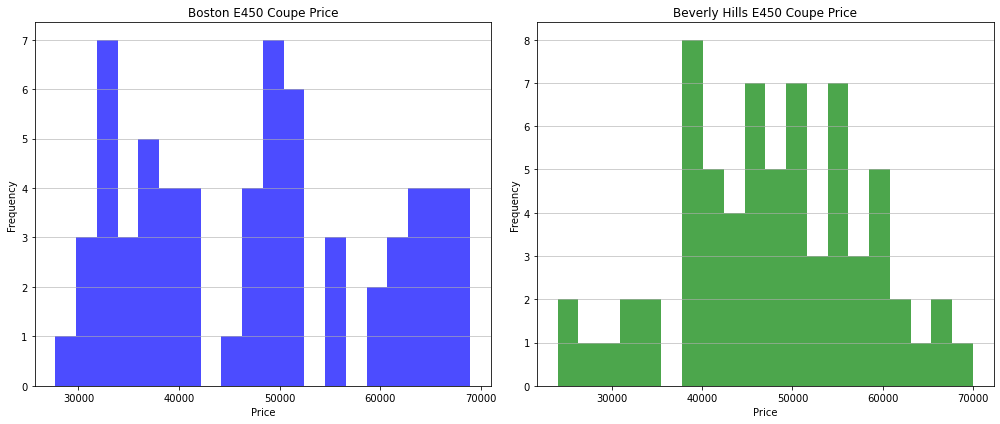

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].hist(bos_car['price'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Boston E450 Coupe Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', alpha=0.75)

axs[1].hist(bh_car['price'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Beverly Hills E450 Coupe Price')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

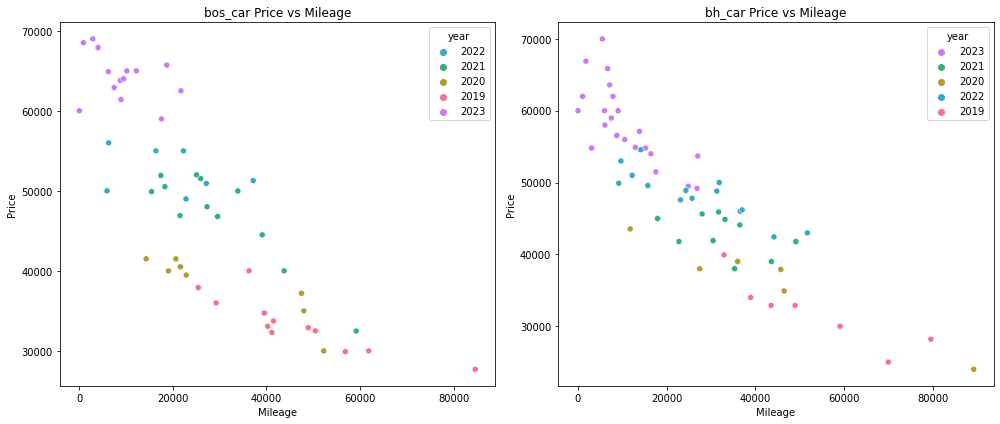

In [14]:
unique_years = sorted(bos_car['year'].unique())
color_mapping = {year: color for year, color in zip(unique_years, sns.color_palette("husl", len(unique_years)))}
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=bos_car, x='mileage', y='price', hue='year', palette=color_mapping, ax=ax[0])
ax[0].set_title('bos_car Price vs Mileage')
ax[0].set_xlabel('Mileage')
ax[0].set_ylabel('Price')

sns.scatterplot(data=bh_car, x='mileage', y='price', hue='year', palette=color_mapping, ax=ax[1])
ax[1].set_title('bh_car Price vs Mileage')
ax[1].set_xlabel('Mileage')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [15]:
bos_corr = bos_car['price'].corr(bos_car['mileage'])

bh_corr = bh_car['price'].corr(bh_car['mileage'])
print('Correlation between E450 Coupe price and mileage: \n'
      f'Boston:{bos_corr.round(4)} \nBeverly Hills:{bh_corr.round(4)}')

Correlation between E450 Coupe price and mileage: 
Boston:-0.836 
Beverly Hills:-0.8847


In [16]:
print('bos',bos_car.describe().round(2),'\n\n',
'bh',bh_car.describe().round(2))

bos         mileage     price
count     65.00     65.00
mean   26539.54  47835.38
std    17595.76  12167.56
min       55.00  27700.00
25%    12232.00  37197.00
50%    22842.00  48990.00
75%    39556.00  58988.00
max    84617.00  68979.00 

 bh         mileage     price
count     68.00     68.00
mean   26260.22  47787.66
std    18884.71  10133.69
min       55.00  23996.00
25%     9725.00  41776.00
50%    25324.00  48311.50
75%    36151.00  54790.75
max    89229.00  69994.00


## Depreciation Calculation

In [43]:
bos_2023 = bos_car[bos_car['year'] == '2023']['price'].mean()
bos_2019 = bos_car[bos_car['year'] == '2019']['price'].mean()
bh_2023 = bh_car[bh_car['year'] == '2023']['price'].mean()
bh_2019 = bh_car[bh_car['year'] == '2019']['price'].mean()

bos_dep = (bos_2023 - bos_2019)/5
bh_dep = (bh_2023 - bh_2019)/5

print('The depreciation value per year:\n',
     f'Boston: {bos_dep.round(2)} \nBeverly Hills:{bh_dep.round(2)}')

The depreciation value per year:
 Boston: 6106.52 
Beverly Hills:5249.87


## Price Prediction

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
bos_car['age'] = 2024 - bos_car['year'].astype(int)
X_bos = bos_car[['mileage', 'age']] 
y_bos = bos_car['price'] 

X_train_bos, X_test_bos, y_train_bos, y_test_bos = train_test_split(X_bos, y_bos, test_size=0.2, random_state=42)

model_bos = LinearRegression()
model_bos.fit(X_train_bos, y_train_bos)

LinearRegression()

In [27]:
bh_car['age'] = 2024 - bh_car['year'].astype(int)
X_bh = bh_car[['mileage', 'age']] 
y_bh = bh_car['price'] 

X_train_bh, X_test_bh, y_train_bh, y_test_bh = train_test_split(X_bh, y_bh, test_size=0.2, random_state=42)

model_bh = LinearRegression()
model_bh.fit(X_train_bh, y_train_bh)

LinearRegression()

In [42]:
def predict_price(miles):
    predict_bos= model_bos.predict([[miles, 3]])
    predict_bh= model_bh.predict([[miles, 3]])
    
    print(f'The E450 Coupe with a mileage of {miles} will be priced: \n'
          f'{predict_bos.round(2)} in Boston, {predict_bh.round(2)} in Beverly Hills \n')

predict_price(20000)

predict_price(40000)

The E450 Coupe with a mileage of 20000 will be priced: 
[48905.86] in Boston, [47353.04] in Beverly Hills 

The E450 Coupe with a mileage of 40000 will be priced: 
[44586.82] in Boston, [41731.09] in Beverly Hills 



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
